<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/2.%20Week%202/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


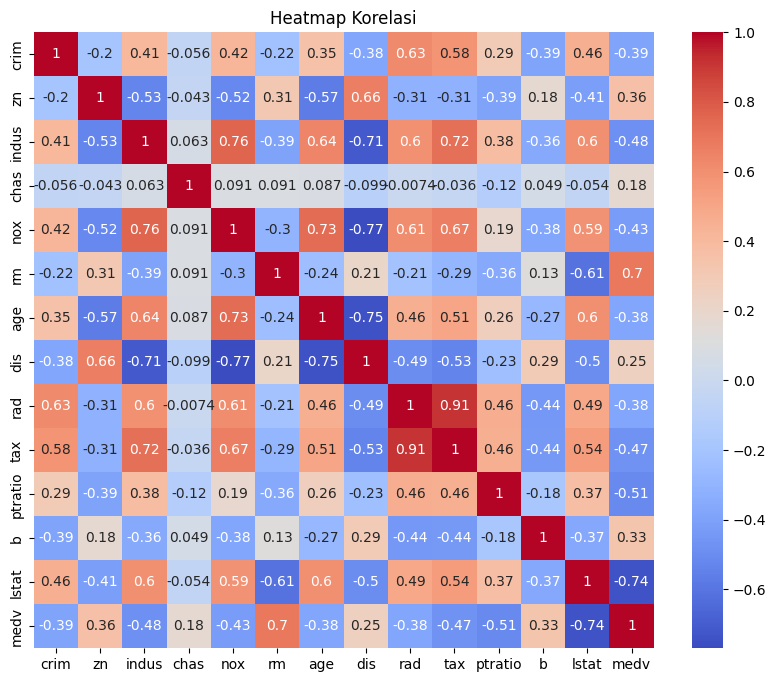

In [ ]:
corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


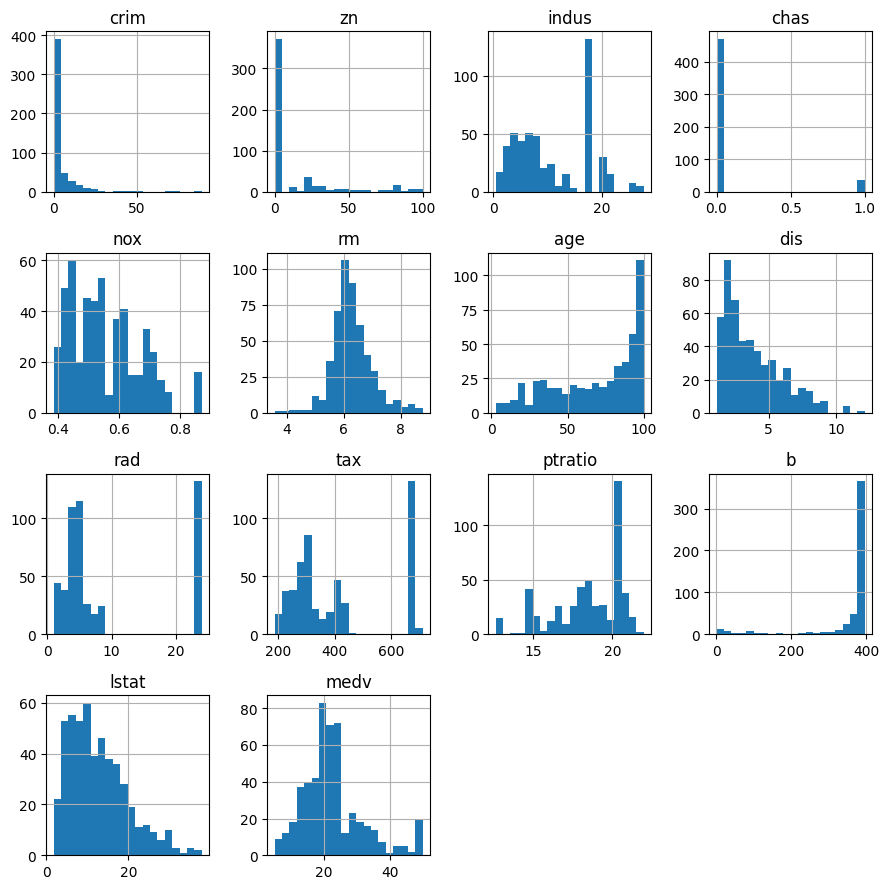

In [ ]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


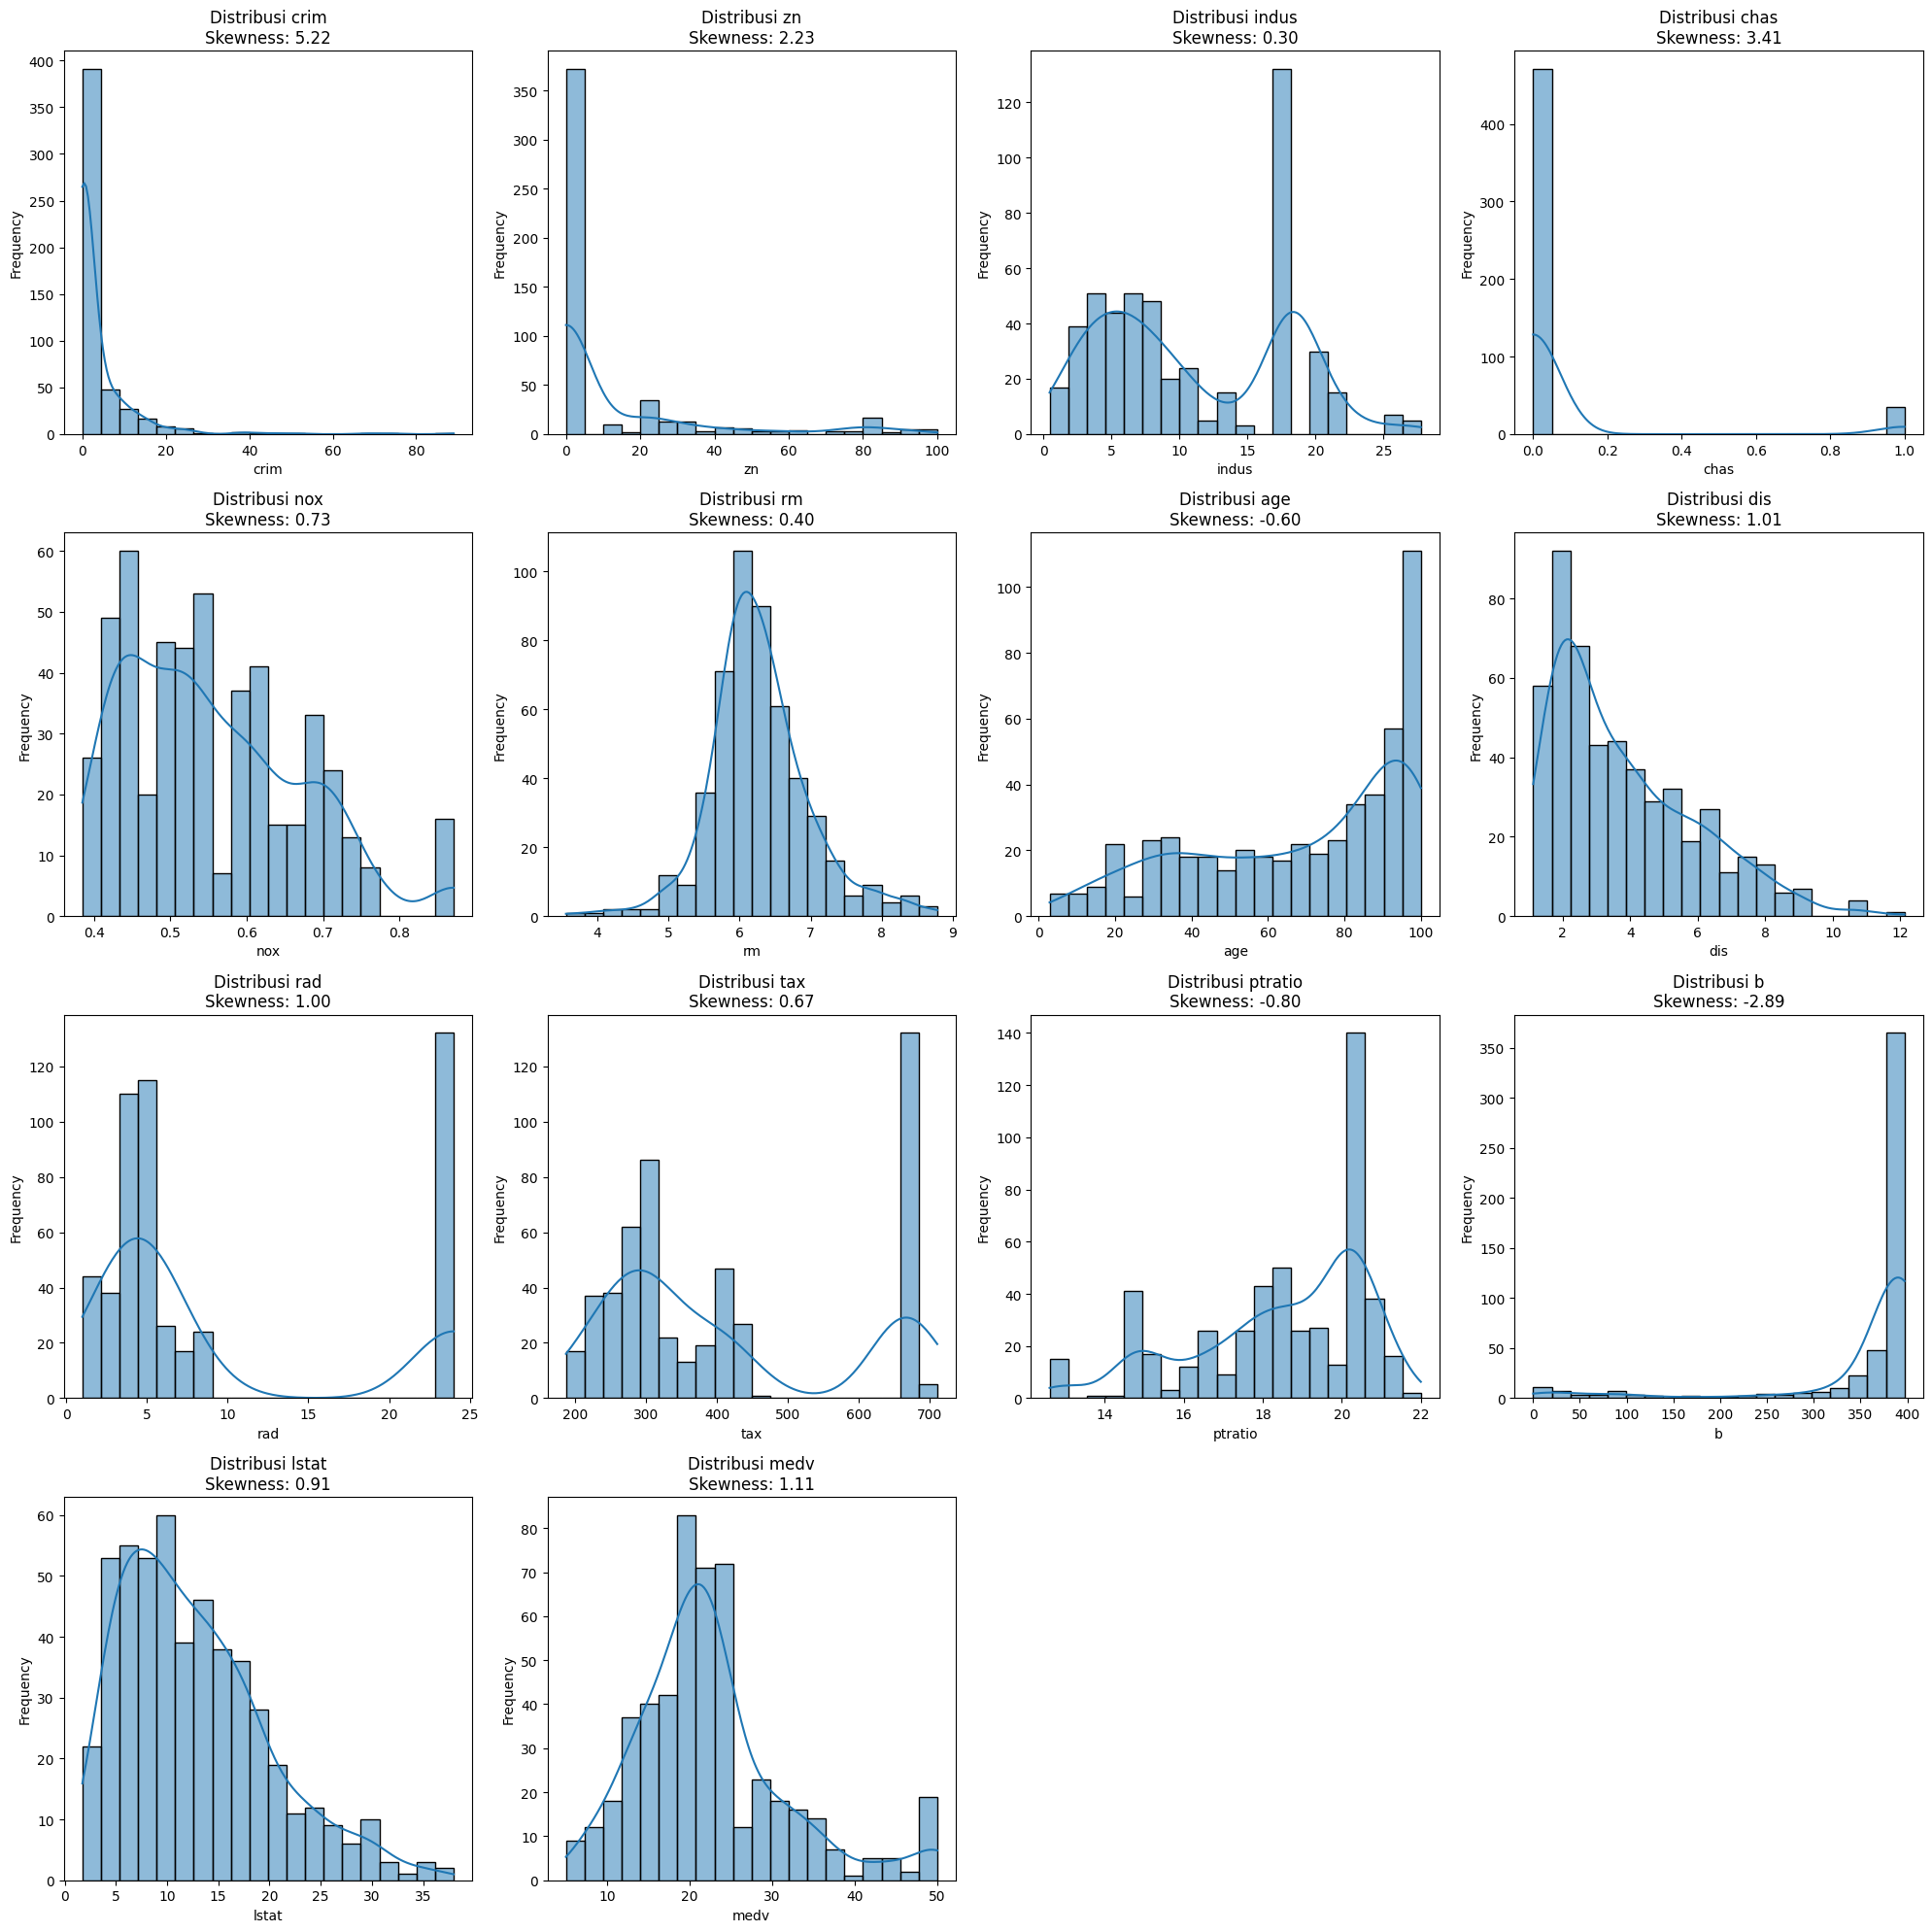

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


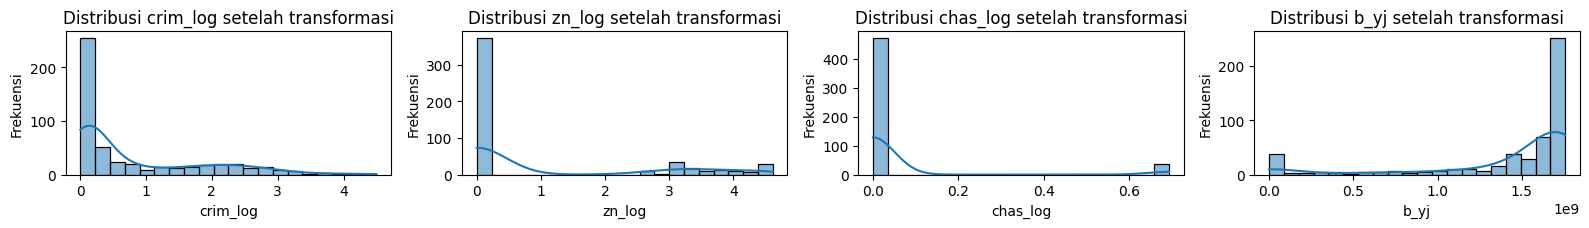

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


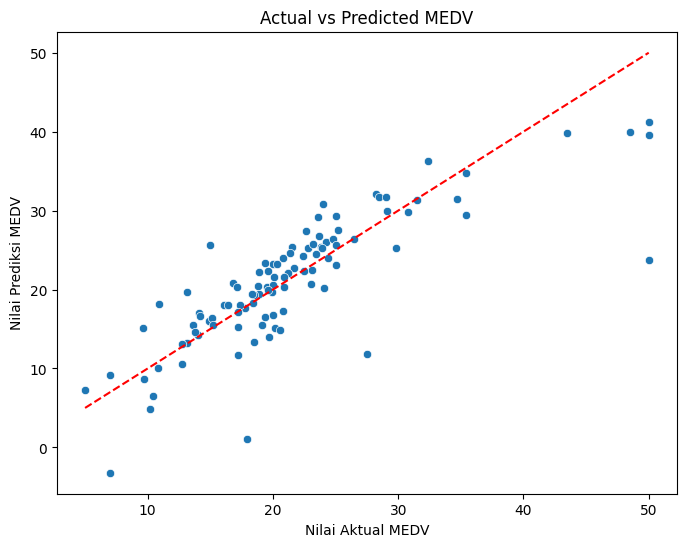

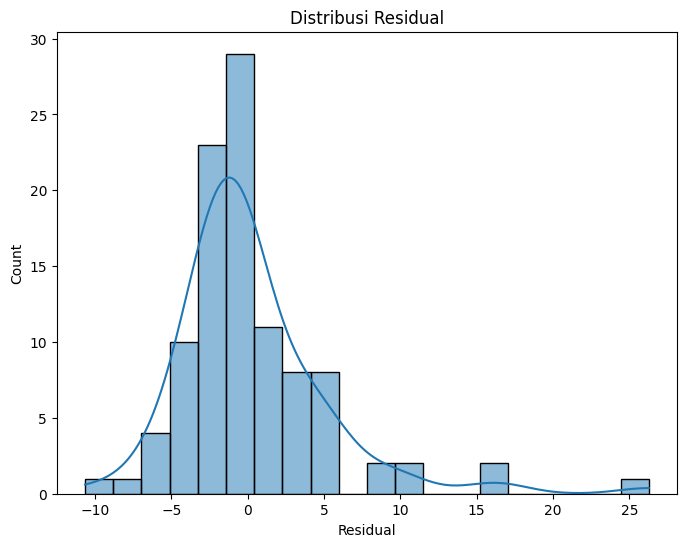

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---

#1. Transformasi Data
## a. Log Transform

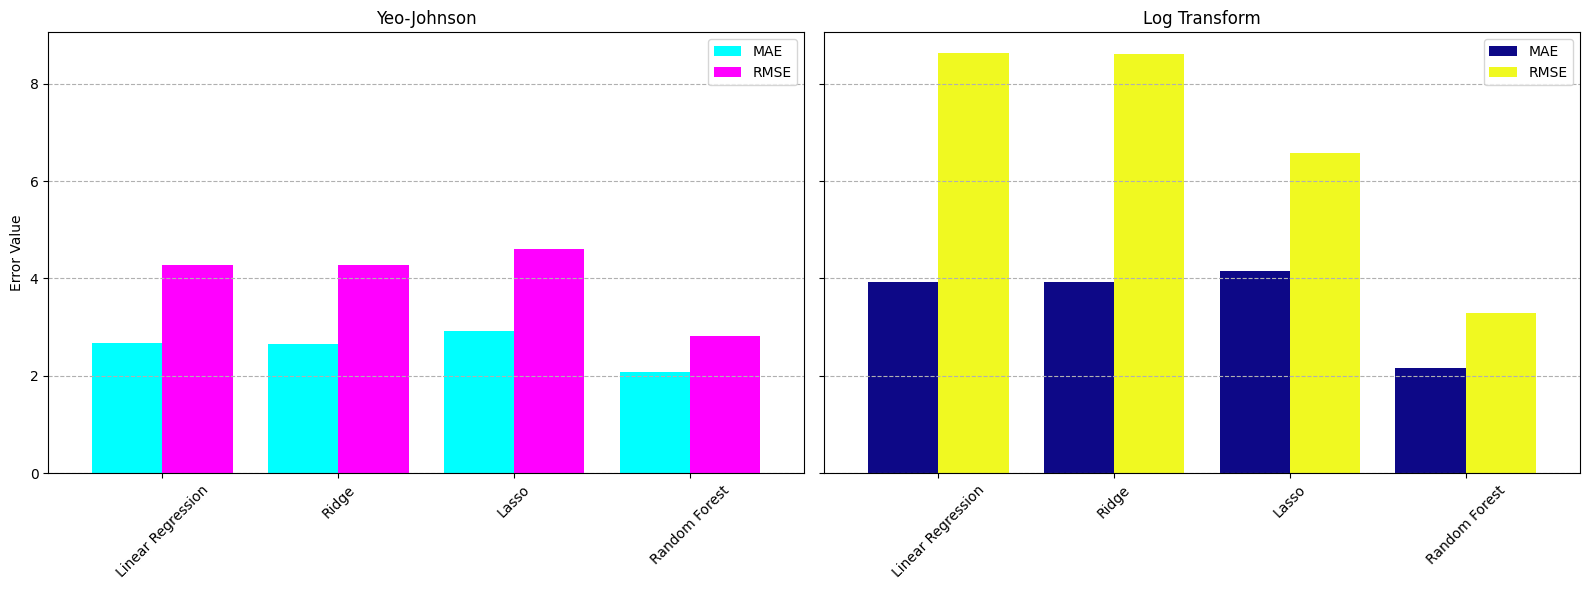

<Figure size 1000x600 with 0 Axes>

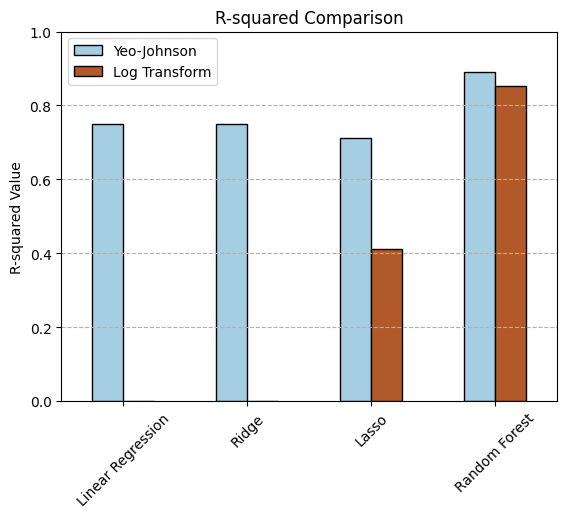

=== Yeo-Johnson Results ===
                     MAE   RMSE     R2
Linear Regression  2.663  4.275  0.751
Ridge              2.658  4.278  0.750
Lasso              2.912  4.601  0.711
Random Forest      2.077  2.826  0.891

=== Log Transform Results ===
                     MAE   RMSE     R2
Linear Regression  3.926  8.622 -0.014
Ridge              3.920  8.611 -0.011
Lasso              4.150  6.566  0.412
Random Forest      2.156  3.290  0.852


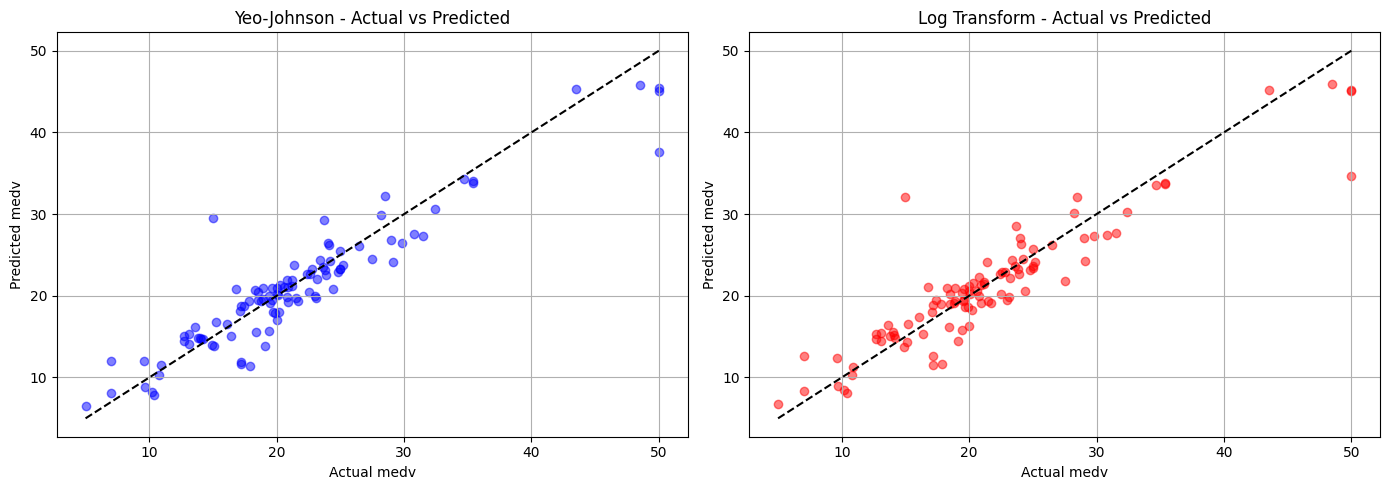

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# 2. Data Preparation
X = df.drop('medv', axis=1)
y = df['medv']

# 3. Fungsi Evaluasi dengan Inverse Transformasi yang Tepat
def evaluate_transformation(X, y, transformation_name, y_transformer=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Handle inverse transform
        if y_transformer:  # Untuk Yeo-Johnson
            y_test_inv = y_transformer.inverse_transform(y_test.reshape(-1, 1)).flatten()
            y_pred_inv = y_transformer.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        elif 'log' in transformation_name.lower():  # Untuk log transform
            y_pred = np.clip(y_pred, a_min=-1, a_max=None)
            y_test_inv = np.expm1(y_test)
            y_pred_inv = np.expm1(y_pred)
        else:
            y_test_inv = y_test
            y_pred_inv = y_pred

        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        r2 = r2_score(y_test_inv, y_pred_inv)

        results[name] = [mae, rmse, r2]

    return pd.DataFrame(results, index=['MAE', 'RMSE', 'R2']).T

# 4. Transformasi Yeo-Johnson
pt_X_yj = PowerTransformer(method='yeo-johnson')
X_yeojohnson = pt_X_yj.fit_transform(X)

pt_y_yj = PowerTransformer(method='yeo-johnson')
y_yeojohnson = pt_y_yj.fit_transform(y.values.reshape(-1, 1)).flatten()

yeojohnson_results = evaluate_transformation(X_yeojohnson, y_yeojohnson, 'Yeo-Johnson', pt_y_yj)

# 5. Transformasi Log
X_log = X.copy()
for col in X_log.select_dtypes(include=['float64', 'int64']):
    X_log[col] = X_log[col] - X_log[col].min() + 1e-6

X_log = np.log(X_log)
y_log = np.log1p(y)

log_results = evaluate_transformation(X_log, y_log, 'LogTransform')

# 6. Visualisasi Perbandingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Yeo-Johnson
yeojohnson_results[['MAE', 'RMSE']].plot(
    kind='bar', ax=axes[0], title='Yeo-Johnson',
    colormap='cool', rot=45, width=0.8
)
axes[0].set_ylabel('Error Value')

# Log Transform
log_results[['MAE', 'RMSE']].plot(
    kind='bar', ax=axes[1], title='Log Transform',
    colormap='plasma', rot=45, width=0.8
)

for ax in axes:
    ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 7. Perbandingan R-squared
r2_comparison = pd.concat([
    yeojohnson_results['R2'].rename('Yeo-Johnson'),
    log_results['R2'].rename('Log Transform')
], axis=1)

plt.figure(figsize=(10, 6))
r2_comparison.plot(kind='bar', title='R-squared Comparison',
                  colormap='Paired', edgecolor='black', rot=45)
plt.ylabel('R-squared Value')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

# 8. Tampilkan Hasil Numerik
print("=== Yeo-Johnson Results ===")
print(yeojohnson_results.round(3))
print("\n=== Log Transform Results ===")
print(log_results.round(3))

# 9. Plot Actual vs Predicted untuk Kedua Transformasi (Perbaikan)
def plot_actual_vs_predicted(transformation_name, y_test_inv, y_pred_inv, color, ax):
    ax.scatter(y_test_inv, y_pred_inv, alpha=0.5, color=color)
    min_val = min(y_test_inv.min(), y_pred_inv.min())
    max_val = max(y_test_inv.max(), y_pred_inv.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--')
    ax.set_xlabel('Actual medv')
    ax.set_ylabel('Predicted medv')
    ax.set_title(f'{transformation_name} - Actual vs Predicted')
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Yeo-Johnson (Perbaikan)
X_train_yj, X_test_yj, y_train_yj, y_test_yj = train_test_split(
    X_yeojohnson, y_yeojohnson, test_size=0.2, random_state=42
)

# 1. Buat scaler terpisah
scaler_yj = StandardScaler()

# 2. Fit dan transform pada data training
X_train_yj_scaled = scaler_yj.fit_transform(X_train_yj)

# 3. Gunakan scaler yang sama untuk transform data test
X_test_yj_scaled = scaler_yj.transform(X_test_yj)

model_yj = RandomForestRegressor().fit(X_train_yj_scaled, y_train_yj)
y_pred_yj = model_yj.predict(X_test_yj_scaled)

plot_actual_vs_predicted('Yeo-Johnson',
                        pt_y_yj.inverse_transform(y_test_yj.reshape(-1, 1)).flatten(),
                        pt_y_yj.inverse_transform(y_pred_yj.reshape(-1, 1)).flatten(),
                        'blue', axes[0])

# Log Transform (Perbaikan)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

# 1. Buat scaler terpisah
scaler_log = StandardScaler()

# 2. Fit dan transform pada data training
X_train_log_scaled = scaler_log.fit_transform(X_train_log)

# 3. Gunakan scaler yang sama untuk transform data test
X_test_log_scaled = scaler_log.transform(X_test_log)

model_log = RandomForestRegressor().fit(X_train_log_scaled, y_train_log)
y_pred_log = model_log.predict(X_test_log_scaled)

plot_actual_vs_predicted('Log Transform',
                        np.expm1(y_test_log),
                        np.expm1(np.clip(y_pred_log, -1, None)),
                        'red', axes[1])

plt.tight_layout()
plt.show()

##b. Box-Cox Transform

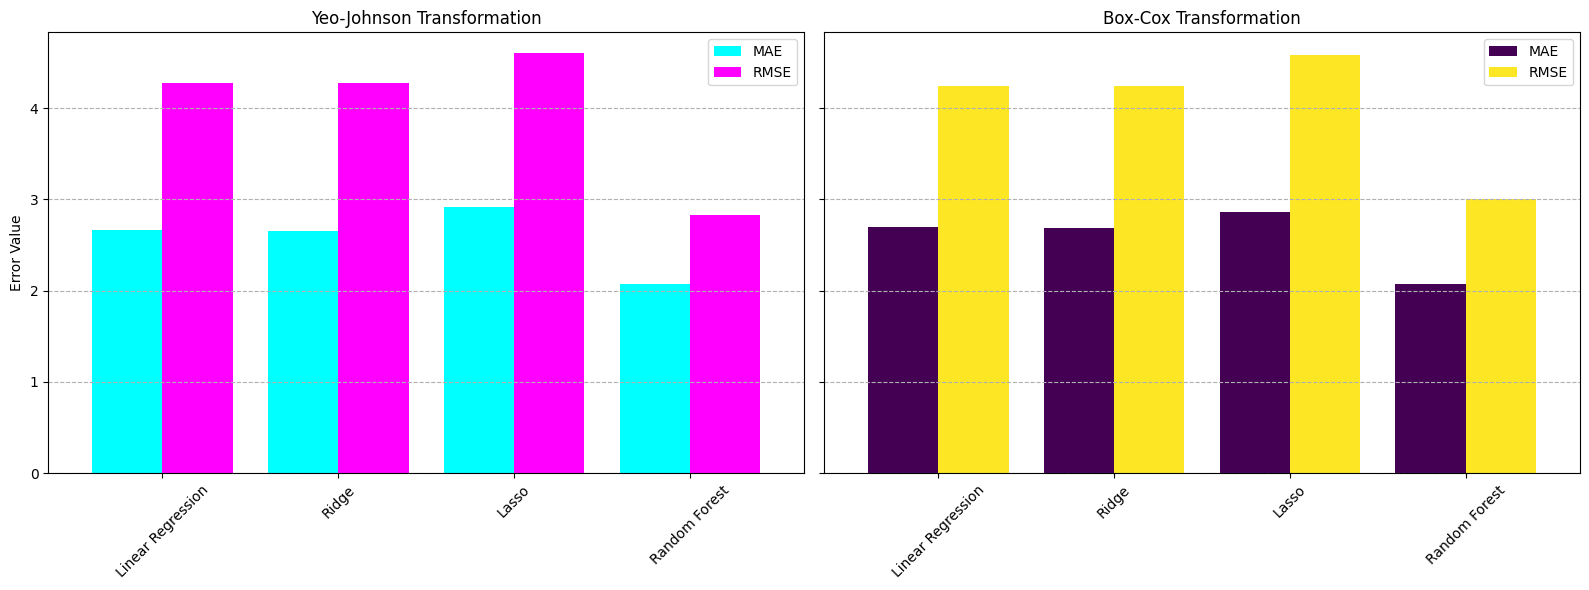

<Figure size 1000x600 with 0 Axes>

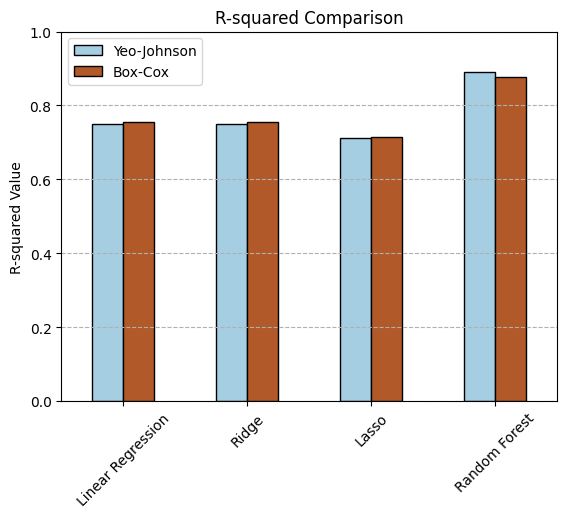

=== Yeo-Johnson Results ===
                     MAE   RMSE     R2
Linear Regression  2.663  4.275  0.751
Ridge              2.658  4.278  0.750
Lasso              2.912  4.601  0.711
Random Forest      2.077  2.826  0.891

=== Box-Cox Results ===
                     MAE   RMSE     R2
Linear Regression  2.694  4.244  0.754
Ridge              2.687  4.245  0.754
Lasso              2.860  4.580  0.714
Random Forest      2.077  3.006  0.877


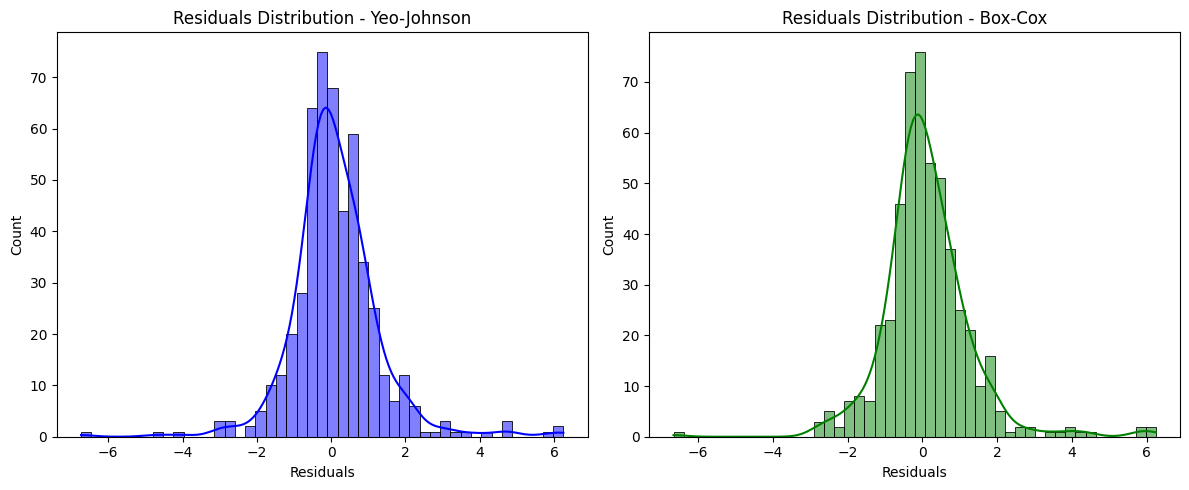

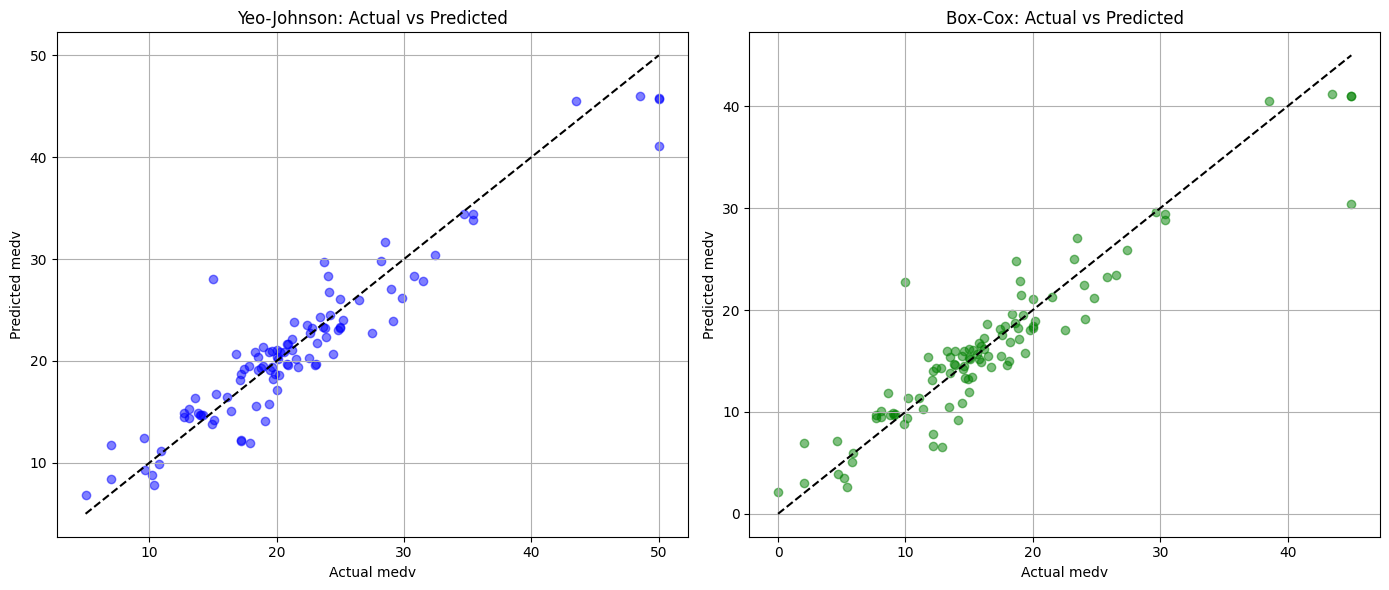

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# 2. Data Preparation
X = df.drop('medv', axis=1)
y = df['medv']

# 3. Fungsi Evaluasi dengan Inverse Transformasi yang Tepat
def evaluate_transformation(X, y, transformation_name, y_transformer=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Inverse transform untuk target
        if y_transformer:
            y_test_inv = y_transformer.inverse_transform(y_test.reshape(-1, 1)).flatten()
            y_pred_inv = y_transformer.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        else:
            y_test_inv = y_test
            y_pred_inv = y_pred

        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        r2 = r2_score(y_test_inv, y_pred_inv)

        results[name] = [mae, rmse, r2]

    return pd.DataFrame(results, index=['MAE', 'RMSE', 'R2']).T

# 4. Transformasi Yeo-Johnson
pt_X_yj = PowerTransformer(method='yeo-johnson')
X_yeojohnson = pt_X_yj.fit_transform(X)

pt_y_yj = PowerTransformer(method='yeo-johnson')
y_yeojohnson = pt_y_yj.fit_transform(y.values.reshape(-1, 1)).flatten()

yeojohnson_results = evaluate_transformation(X_yeojohnson, y_yeojohnson, 'Yeo-Johnson', pt_y_yj)

# 5. Transformasi Box-Cox dengan Penanganan Nilai Positif
# Pra-pemrosesan untuk memastikan nilai positif
X_boxcox = X.copy()
for col in X_boxcox.select_dtypes(include=['float64', 'int64']):
    X_boxcox[col] = X_boxcox[col] - X_boxcox[col].min() + 1e-6

y_boxcox = y.copy()
y_boxcox = y_boxcox - y_boxcox.min() + 1e-6

# Transformasi Box-Cox
pt_X_bc = PowerTransformer(method='box-cox')
X_boxcox_trans = pt_X_bc.fit_transform(X_boxcox)

pt_y_bc = PowerTransformer(method='box-cox')
y_boxcox_trans = pt_y_bc.fit_transform(y_boxcox.values.reshape(-1, 1)).flatten()

boxcox_results = evaluate_transformation(X_boxcox_trans, y_boxcox_trans, 'Box-Cox', pt_y_bc)

# 6. Visualisasi Perbandingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Yeo-Johnson
yeojohnson_results[['MAE', 'RMSE']].plot(
    kind='bar',
    ax=axes[0],
    title='Yeo-Johnson Transformation',
    colormap='cool',
    rot=45,
    width=0.8
)
axes[0].set_ylabel('Error Value')
axes[0].grid(axis='y', linestyle='--')

# Plot Box-Cox
boxcox_results[['MAE', 'RMSE']].plot(
    kind='bar',
    ax=axes[1],
    title='Box-Cox Transformation',
    colormap='viridis',
    rot=45,
    width=0.8
)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# 7. Perbandingan R-squared
r2_comparison = pd.concat([
    yeojohnson_results['R2'].rename('Yeo-Johnson'),
    boxcox_results['R2'].rename('Box-Cox')
], axis=1)

plt.figure(figsize=(10, 6))
r2_comparison.plot(
    kind='bar',
    title='R-squared Comparison',
    colormap='Paired',
    edgecolor='black',
    rot=45
)
plt.ylabel('R-squared Value')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

# 8. Tampilkan Hasil Numerik
print("=== Yeo-Johnson Results ===")
print(yeojohnson_results.round(3))
print("\n=== Box-Cox Results ===")
print(boxcox_results.round(3))

# 9. Plot Residuals untuk Model Terbaik
best_model = 'Random Forest'

# Plot untuk Yeo-Johnson
model_yj = RandomForestRegressor().fit(X_yeojohnson, y_yeojohnson)
residuals_yj = pt_y_yj.inverse_transform(y_yeojohnson.reshape(-1, 1)).flatten() - pt_y_yj.inverse_transform(model_yj.predict(X_yeojohnson).reshape(-1, 1)).flatten()

# Plot untuk Box-Cox
model_bc = RandomForestRegressor().fit(X_boxcox_trans, y_boxcox_trans)
residuals_bc = pt_y_bc.inverse_transform(y_boxcox_trans.reshape(-1, 1)).flatten() - pt_y_bc.inverse_transform(model_bc.predict(X_boxcox_trans).reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_yj, kde=True, color='blue')
plt.title('Residuals Distribution - Yeo-Johnson')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_bc, kde=True, color='green')
plt.title('Residuals Distribution - Box-Cox')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# 10. Grafik Actual vs Predicted medv
# Prediksi menggunakan data test untuk Yeo-Johnson
X_train_yj, X_test_yj, y_train_yj, y_test_yj = train_test_split(X_yeojohnson, y_yeojohnson, test_size=0.2, random_state=42)
scaler_yj = StandardScaler()
X_train_yj_scaled = scaler_yj.fit_transform(X_train_yj)
X_test_yj_scaled = scaler_yj.transform(X_test_yj)
rf_yj = RandomForestRegressor(n_estimators=100, random_state=42)
rf_yj.fit(X_train_yj_scaled, y_train_yj)
y_pred_yj = rf_yj.predict(X_test_yj_scaled)

# Inverse transform untuk mendapatkan nilai asli
y_test_inv_yj = pt_y_yj.inverse_transform(y_test_yj.reshape(-1, 1)).flatten()
y_pred_inv_yj = pt_y_yj.inverse_transform(y_pred_yj.reshape(-1, 1)).flatten()

# Prediksi menggunakan data test untuk Box-Cox
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_boxcox_trans, y_boxcox_trans, test_size=0.2, random_state=42)
scaler_bc = StandardScaler()
X_train_bc_scaled = scaler_bc.fit_transform(X_train_bc)
X_test_bc_scaled = scaler_bc.transform(X_test_bc)
rf_bc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_bc.fit(X_train_bc_scaled, y_train_bc)
y_pred_bc = rf_bc.predict(X_test_bc_scaled)

# Inverse transform untuk mendapatkan nilai asli
y_test_inv_bc = pt_y_bc.inverse_transform(y_test_bc.reshape(-1, 1)).flatten()
y_pred_inv_bc = pt_y_bc.inverse_transform(y_pred_bc.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(14, 6))

# Yeo-Johnson
plt.subplot(1, 2, 1)
plt.scatter(y_test_inv_yj, y_pred_inv_yj, alpha=0.5, color='blue')
plt.plot([min(y_test_inv_yj), max(y_test_inv_yj)], [min(y_test_inv_yj), max(y_test_inv_yj)], 'k--')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Yeo-Johnson: Actual vs Predicted')
plt.grid(True)

# Box-Cox
plt.subplot(1, 2, 2)
plt.scatter(y_test_inv_bc, y_pred_inv_bc, alpha=0.5, color='green')
plt.plot([min(y_test_inv_bc), max(y_test_inv_bc)], [min(y_test_inv_bc), max(y_test_inv_bc)], 'k--')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Box-Cox: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

##c. Quantile Transform

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


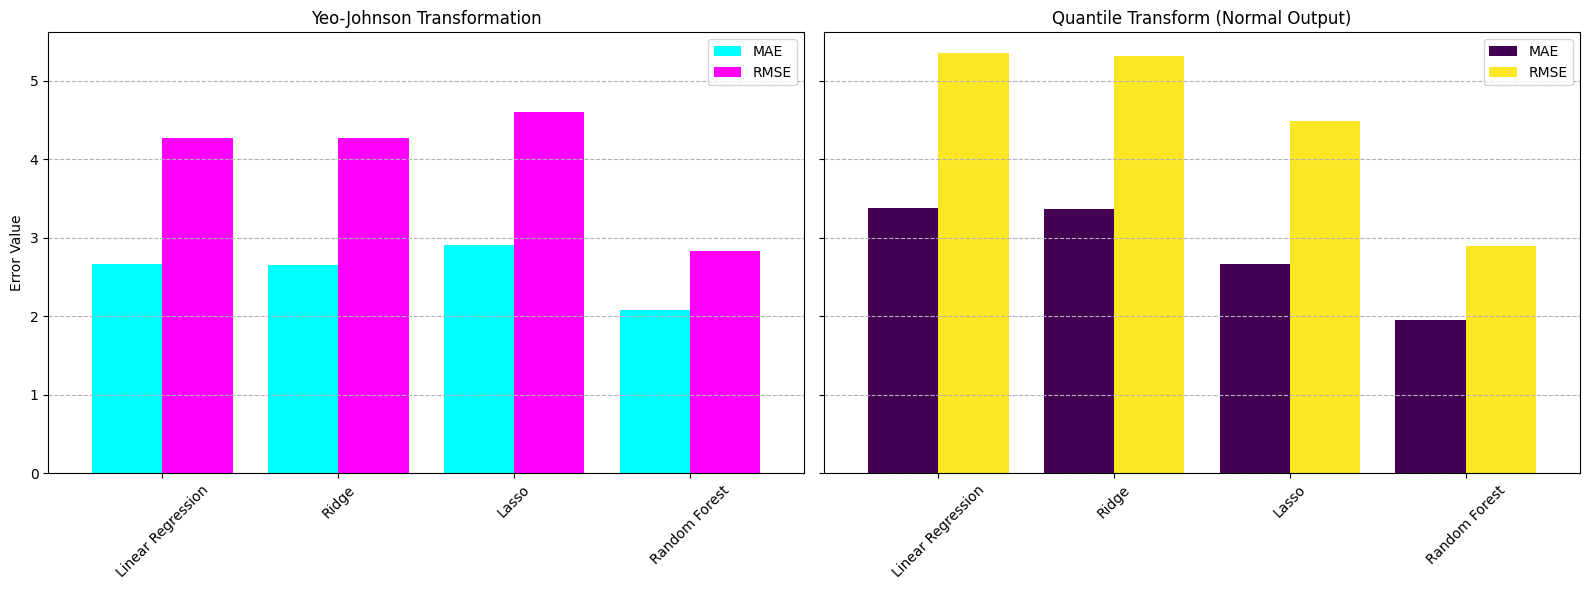

<Figure size 1000x600 with 0 Axes>

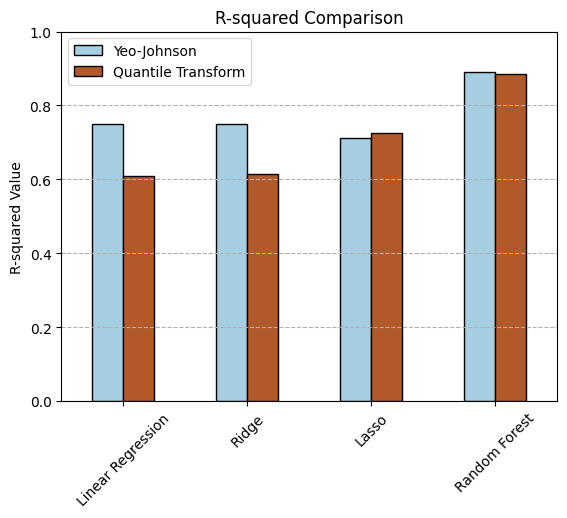

=== Yeo-Johnson Results ===
                     MAE   RMSE     R2
Linear Regression  2.663  4.275  0.751
Ridge              2.658  4.278  0.750
Lasso              2.912  4.601  0.711
Random Forest      2.077  2.826  0.891

=== Quantile Transform Results ===
                     MAE   RMSE     R2
Linear Regression  3.386  5.352  0.609
Ridge              3.366  5.317  0.615
Lasso              2.669  4.494  0.725
Random Forest      1.955  2.902  0.885


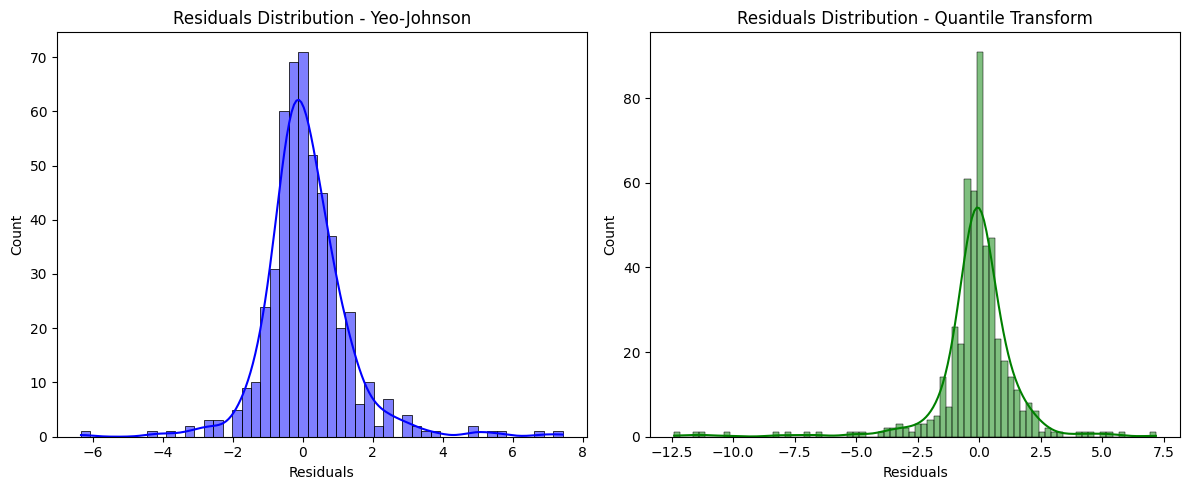

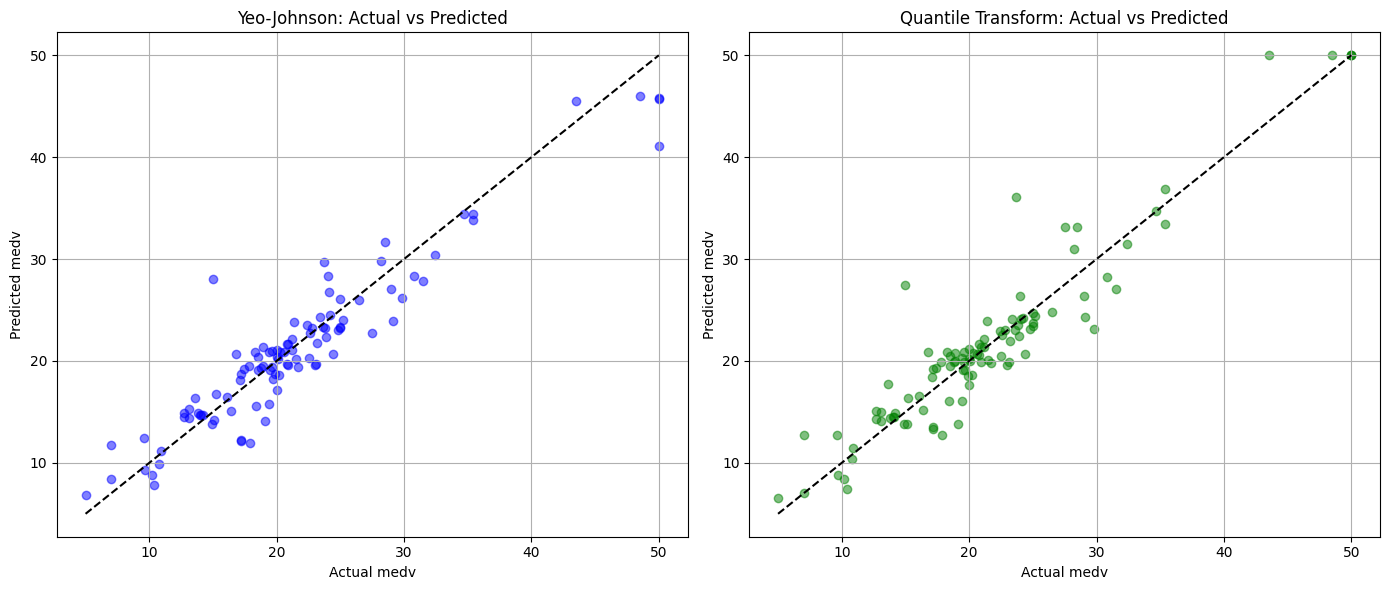

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# 2. Data Preparation
X = df.drop('medv', axis=1)
y = df['medv']

# 3. Fungsi Evaluasi dengan Inverse Transformasi yang Tepat
def evaluate_transformation(X, y, transformation_name, y_transformer=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Lakukan inverse transform untuk target bila transformer diberikan
        if y_transformer:
            y_test_inv = y_transformer.inverse_transform(y_test.reshape(-1, 1)).flatten()
            y_pred_inv = y_transformer.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        else:
            y_test_inv = y_test
            y_pred_inv = y_pred

        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        r2 = r2_score(y_test_inv, y_pred_inv)

        results[name] = [mae, rmse, r2]

    return pd.DataFrame(results, index=['MAE', 'RMSE', 'R2']).T

# 4. Transformasi Yeo-Johnson
pt_X_yj = PowerTransformer(method='yeo-johnson')
X_yeojohnson = pt_X_yj.fit_transform(X)

pt_y_yj = PowerTransformer(method='yeo-johnson')
y_yeojohnson = pt_y_yj.fit_transform(y.values.reshape(-1, 1)).flatten()

yeojohnson_results = evaluate_transformation(X_yeojohnson, y_yeojohnson, 'Yeo-Johnson', pt_y_yj)

# 5. Transformasi Quantile Transform
# QuantileTransformer membutuhkan data input > 0 agar inverse_transform akurat,
# namun pada umumnya ia dapat menangani data apapun.
qt_X = QuantileTransformer(output_distribution='normal', random_state=42)
X_quantile = qt_X.fit_transform(X)

qt_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_quantile = qt_y.fit_transform(y.values.reshape(-1, 1)).flatten()

quantile_results = evaluate_transformation(X_quantile, y_quantile, 'Quantile Transform', qt_y)

# 6. Visualisasi Perbandingan Hasil (MAE & RMSE)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Yeo-Johnson
yeojohnson_results[['MAE', 'RMSE']].plot(
    kind='bar',
    ax=axes[0],
    title='Yeo-Johnson Transformation',
    colormap='cool',
    rot=45,
    width=0.8
)
axes[0].set_ylabel('Error Value')
axes[0].grid(axis='y', linestyle='--')

# Plot Quantile Transform
quantile_results[['MAE', 'RMSE']].plot(
    kind='bar',
    ax=axes[1],
    title='Quantile Transform (Normal Output)',
    colormap='viridis',
    rot=45,
    width=0.8
)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# 7. Perbandingan R-squared
r2_comparison = pd.concat([
    yeojohnson_results['R2'].rename('Yeo-Johnson'),
    quantile_results['R2'].rename('Quantile Transform')
], axis=1)

plt.figure(figsize=(10, 6))
r2_comparison.plot(
    kind='bar',
    title='R-squared Comparison',
    colormap='Paired',
    edgecolor='black',
    rot=45
)
plt.ylabel('R-squared Value')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

# 8. Tampilkan Hasil Numerik
print("=== Yeo-Johnson Results ===")
print(yeojohnson_results.round(3))
print("\n=== Quantile Transform Results ===")
print(quantile_results.round(3))

# 9. Plot Residuals untuk Model Terbaik (contoh: Random Forest)
# Untuk Yeo-Johnson
model_yj = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_yeojohnson, y_yeojohnson)
residuals_yj = pt_y_yj.inverse_transform(y_yeojohnson.reshape(-1, 1)).flatten() - \
               pt_y_yj.inverse_transform(model_yj.predict(X_yeojohnson).reshape(-1, 1)).flatten()

# Untuk Quantile Transform
model_qt = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_quantile, y_quantile)
residuals_qt = qt_y.inverse_transform(y_quantile.reshape(-1, 1)).flatten() - \
               qt_y.inverse_transform(model_qt.predict(X_quantile).reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_yj, kde=True, color='blue')
plt.title('Residuals Distribution - Yeo-Johnson')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_qt, kde=True, color='green')
plt.title('Residuals Distribution - Quantile Transform')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# 10. Grafik Actual vs Predicted medv untuk model Random Forest

# Yeo-Johnson: Split data, training, prediksi, inverse transform
X_train_yj, X_test_yj, y_train_yj, y_test_yj = train_test_split(X_yeojohnson, y_yeojohnson, test_size=0.2, random_state=42)
scaler_yj = StandardScaler()
X_train_yj_scaled = scaler_yj.fit_transform(X_train_yj)
X_test_yj_scaled = scaler_yj.transform(X_test_yj)
rf_yj = RandomForestRegressor(n_estimators=100, random_state=42)
rf_yj.fit(X_train_yj_scaled, y_train_yj)
y_pred_yj = rf_yj.predict(X_test_yj_scaled)
y_test_inv_yj = pt_y_yj.inverse_transform(y_test_yj.reshape(-1, 1)).flatten()
y_pred_inv_yj = pt_y_yj.inverse_transform(y_pred_yj.reshape(-1, 1)).flatten()

# Quantile Transform: Split data, training, prediksi, inverse transform
X_train_qt, X_test_qt, y_train_qt, y_test_qt = train_test_split(X_quantile, y_quantile, test_size=0.2, random_state=42)
scaler_qt = StandardScaler()
X_train_qt_scaled = scaler_qt.fit_transform(X_train_qt)
X_test_qt_scaled = scaler_qt.transform(X_test_qt)
rf_qt = RandomForestRegressor(n_estimators=100, random_state=42)
rf_qt.fit(X_train_qt_scaled, y_train_qt)
y_pred_qt = rf_qt.predict(X_test_qt_scaled)
y_test_inv_qt = qt_y.inverse_transform(y_test_qt.reshape(-1, 1)).flatten()
y_pred_inv_qt = qt_y.inverse_transform(y_pred_qt.reshape(-1, 1)).flatten()

# Plot Actual vs Predicted
plt.figure(figsize=(14, 6))

# Yeo-Johnson Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_inv_yj, y_pred_inv_yj, alpha=0.5, color='blue')
plt.plot([min(y_test_inv_yj), max(y_test_inv_yj)], [min(y_test_inv_yj), max(y_test_inv_yj)], 'k--')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Yeo-Johnson: Actual vs Predicted')
plt.grid(True)

# Quantile Transform Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_inv_qt, y_pred_inv_qt, alpha=0.5, color='green')
plt.plot([min(y_test_inv_qt), max(y_test_inv_qt)], [min(y_test_inv_qt), max(y_test_inv_qt)], 'k--')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Quantile Transform: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()


#2. Normalisasi dan Standardisasi Data

Data dengan outlier (baris yang terpengaruh):
        crim    zn  indus  chas    nox      rm   age     dis  rad  tax  \
173  0.09178   0.0   4.05     0  0.510  19.248  84.1  2.6463    5  296   
274  0.05644  40.0   6.41     1  0.447  20.274  32.9  4.0776    4  254   
491  0.10574   0.0  27.74     0  0.609  17.949  98.8  1.8681    4  711   
72   0.09164   0.0  10.81     0  0.413  18.195   7.8  5.2873    4  305   
452  5.09017   0.0  18.10     0  0.713  18.891  91.8  2.3682   24  666   

     ptratio       b  lstat  medv  
173     16.6  395.50  27.12  23.6  
274     17.6  396.90  10.59  32.4  
491     20.1  390.11  54.21  13.6  
72      19.2  390.91  16.56  22.8  
452     20.2  385.09  51.81  16.1  

Hasil Evaluasi:
               Model          Scaler       MAE       RMSE        R2
0  Linear Regression    MinMaxScaler  5.399576  11.870176 -0.921367
1  Linear Regression  StandardScaler  5.399576  11.870176 -0.921367
2  Linear Regression    RobustScaler  5.399576  11.870176 -0.921367
3   

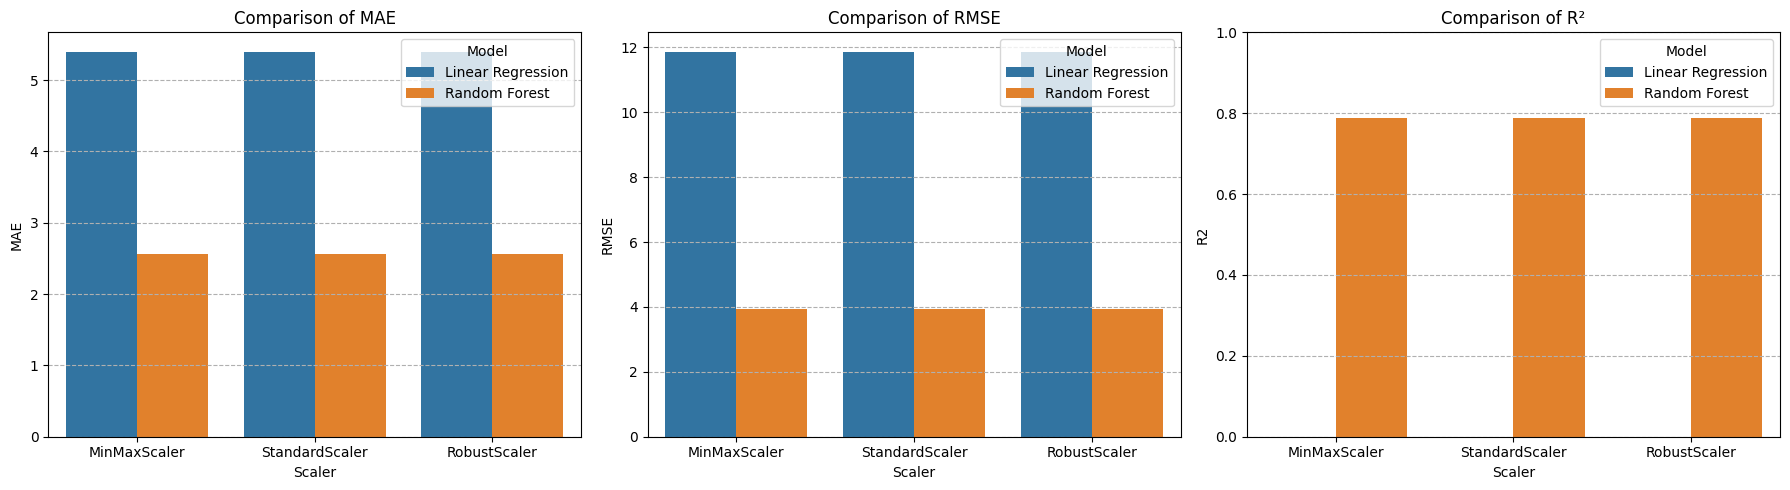

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Tambahkan outlier secara artifisial ke beberapa baris (misal: pada fitur 'rm' dan 'lstat')
np.random.seed(42)
n_outliers = 5
outlier_indices = np.random.choice(df.index, n_outliers, replace=False)
df.loc[outlier_indices, 'rm'] = df['rm'] * 3   # perbesaran nilai rm
df.loc[outlier_indices, 'lstat'] = df['lstat'] * 3   # perbesaran nilai lstat

print("Data dengan outlier (baris yang terpengaruh):")
print(df.loc[outlier_indices])


# 2. Pisahkan fitur dan target
X = df.drop('medv', axis=1)
y = df['medv']


# Fungsi untuk melatih model dan menghitung metrik evaluasi
def evaluate_model(X, y, model, scaler):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Terapkan scaling
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Latih model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Hitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


# Inisialisasi scaler
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

# Pilih dua model untuk perbandingan
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Kumpulan hasil evaluasi
results = []

for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        mae, rmse, r2 = evaluate_model(X, y, model, scaler)
        results.append({
            "Model": model_name,
            "Scaler": scaler_name,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2
        })

results_df = pd.DataFrame(results)
print("\nHasil Evaluasi:")
print(results_df)


# Visualisasi perbandingan metrik untuk semua kombinasi model dan scaler
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
sns.barplot(x="Scaler", y="MAE", hue="Model", data=results_df, ax=axes[0])
axes[0].set_title("Comparison of MAE")
axes[0].grid(axis="y", linestyle="--")

# RMSE
sns.barplot(x="Scaler", y="RMSE", hue="Model", data=results_df, ax=axes[1])
axes[1].set_title("Comparison of RMSE")
axes[1].grid(axis="y", linestyle="--")

# R²
sns.barplot(x="Scaler", y="R2", hue="Model", data=results_df, ax=axes[2])
axes[2].set_title("Comparison of R²")
axes[2].set_ylim(0, 1)
axes[2].grid(axis="y", linestyle="--")

plt.tight_layout()
plt.show()


#3. Discretization pada Fitur Numerik

Data dengan outlier:
        crim    zn  indus  chas    nox      rm   age     dis  rad  tax  \
173  0.09178   0.0   4.05     0  0.510  19.248  84.1  2.6463    5  296   
274  0.05644  40.0   6.41     1  0.447  20.274  32.9  4.0776    4  254   
491  0.10574   0.0  27.74     0  0.609  17.949  98.8  1.8681    4  711   
72   0.09164   0.0  10.81     0  0.413  18.195   7.8  5.2873    4  305   
452  5.09017   0.0  18.10     0  0.713  18.891  91.8  2.3682   24  666   

     ptratio       b  lstat  medv  
173     16.6  395.50  27.12  23.6  
274     17.6  396.90  10.59  32.4  
491     20.1  390.11  54.21  13.6  
72      19.2  390.91  16.56  22.8  
452     20.2  385.09  51.81  16.1  
Continuous Features - MAE: 2.563, RMSE: 3.937, R2: 0.789


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306

Discretized Features - MAE: 2.327, RMSE: 3.234, R2: 0.857

Hasil Evaluasi Model:
  Feature Representation       MAE      RMSE        R2
0             Continuous  2.562784  3.936924  0.788646
1            Discretized  2.327349  3.234392  0.857347


<ipython-input-34-703e4a88476a>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature Representation", y="MAE", data=results, ax=axes[0], palette="coolwarm")
<ipython-input-34-703e4a88476a>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature Representation", y="RMSE", data=results, ax=axes[1], palette="coolwarm")
<ipython-input-34-703e4a88476a>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature Representation", y="R2", data=results, ax=axes[2], palette="coolwarm")


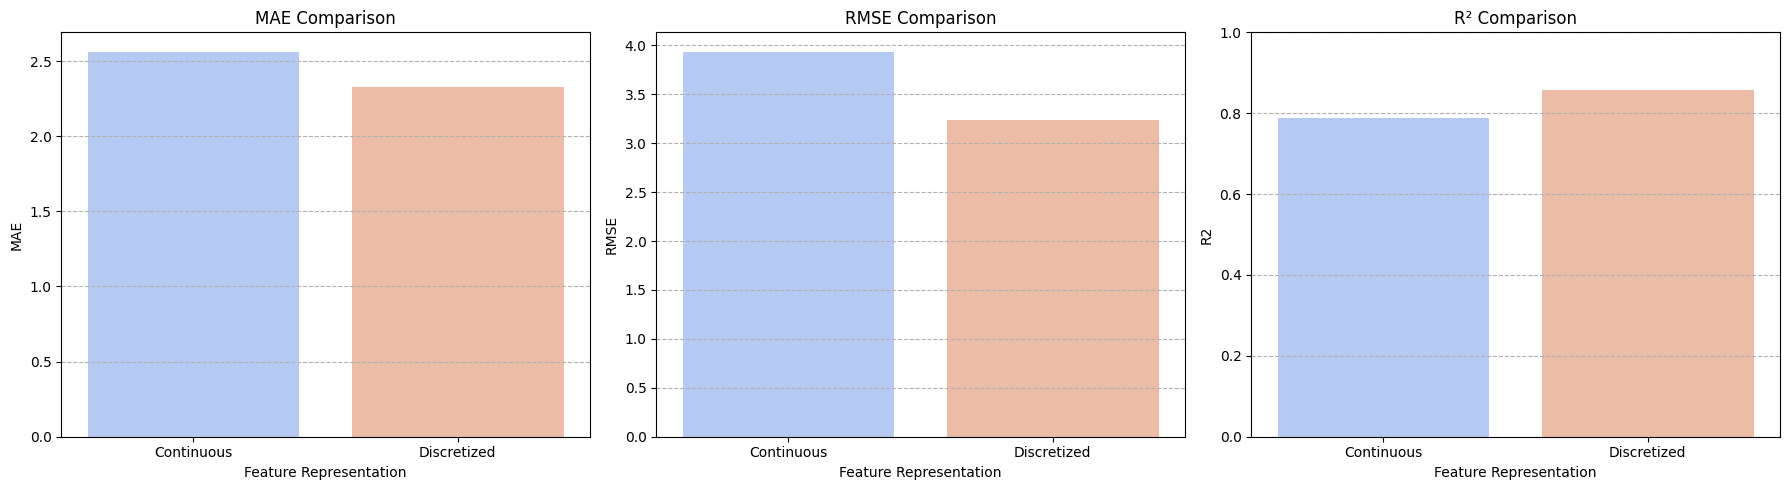

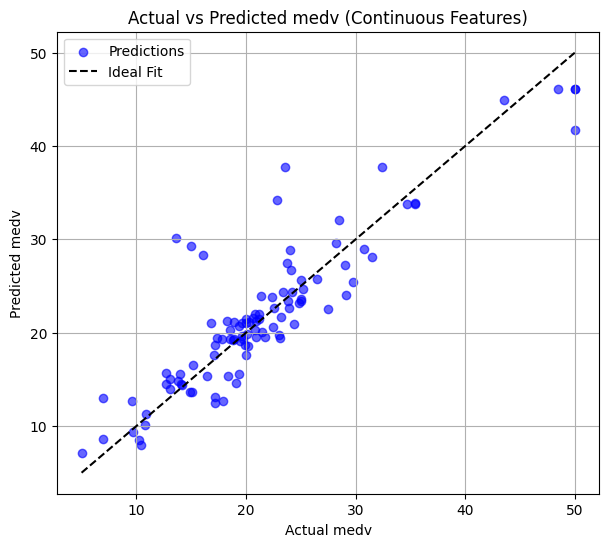

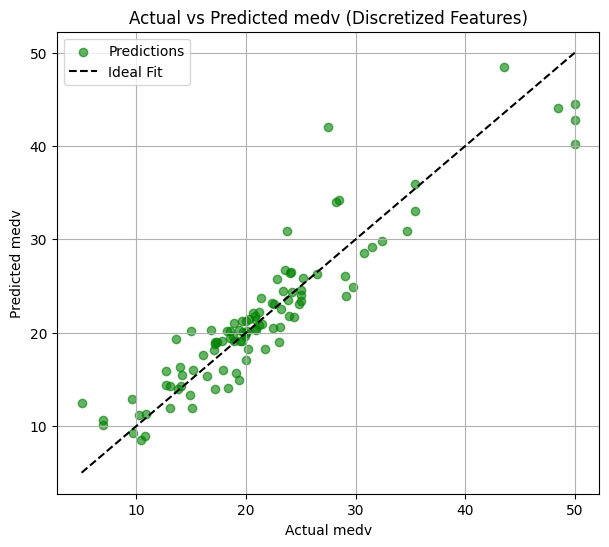

In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1. Load Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Untuk simulasi, tambahkan outlier artifisial pada beberapa fitur (misal 'rm' dan 'lstat')
np.random.seed(42)
n_outliers = 5
outlier_indices = np.random.choice(df.index, n_outliers, replace=False)
df.loc[outlier_indices, 'rm'] = df['rm'] * 3
df.loc[outlier_indices, 'lstat'] = df['lstat'] * 3

# Tampilkan beberapa baris yang terpengaruh outlier
print("Data dengan outlier:")
print(df.loc[outlier_indices])


# 2. Pisahkan fitur dan target
X = df.drop('medv', axis=1)
y = df['medv']


# Fungsi evaluasi model sederhana (menggunakan Random Forest) untuk mendapatkan metrik
def evaluate_model(X, y, model, scaler):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2, y_test, y_pred


# 3. Evaluasi dengan fitur kontinu (asli)
scaler_cont = StandardScaler()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

mae_cont, rmse_cont, r2_cont, y_test_cont, y_pred_cont = evaluate_model(X, y, model_rf, scaler_cont)
print("Continuous Features - MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_cont, rmse_cont, r2_cont))


# 4. Evaluasi dengan fitur diskretisasi
# Gunakan KBinsDiscretizer untuk mengubah fitur kontinu menjadi ordinal (misal dengan 10 bins, strategi quantile)
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_discrete = kbd.fit_transform(X)

scaler_disc = StandardScaler()
mae_disc, rmse_disc, r2_disc, y_test_disc, y_pred_disc = evaluate_model(X_discrete, y, model_rf, scaler_disc)
print("Discretized Features - MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_disc, rmse_disc, r2_disc))


# 5. Visualisasi Perbandingan Metrik
results = pd.DataFrame({
    "Feature Representation": ["Continuous", "Discretized"],
    "MAE": [mae_cont, mae_disc],
    "RMSE": [rmse_cont, rmse_disc],
    "R2": [r2_cont, r2_disc]
})
print("\nHasil Evaluasi Model:")
print(results)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="Feature Representation", y="MAE", data=results, ax=axes[0], palette="coolwarm")
axes[0].set_title("MAE Comparison")
axes[0].grid(axis="y", linestyle="--")

sns.barplot(x="Feature Representation", y="RMSE", data=results, ax=axes[1], palette="coolwarm")
axes[1].set_title("RMSE Comparison")
axes[1].grid(axis="y", linestyle="--")

sns.barplot(x="Feature Representation", y="R2", data=results, ax=axes[2], palette="coolwarm")
axes[2].set_title("R² Comparison")
axes[2].set_ylim(0, 1)
axes[2].grid(axis="y", linestyle="--")

plt.tight_layout()
plt.show()


# 6. Grafik Actual vs Predicted medv untuk fitur kontinu
plt.figure(figsize=(7,6))
plt.scatter(y_test_cont, y_pred_cont, alpha=0.6, color='blue', label="Predictions")
min_val = min(y_test_cont.min(), y_pred_cont.min())
max_val = max(y_test_cont.max(), y_pred_cont.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal Fit')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Actual vs Predicted medv (Continuous Features)')
plt.legend()
plt.grid(True)
plt.show()


# 7. Grafik Actual vs Predicted medv untuk fitur diskret
plt.figure(figsize=(7,6))
plt.scatter(y_test_disc, y_pred_disc, alpha=0.6, color='green', label="Predictions")
min_val_disc = min(y_test_disc.min(), y_pred_disc.min())
max_val_disc = max(y_test_disc.max(), y_pred_disc.max())
plt.plot([min_val_disc, max_val_disc], [min_val_disc, max_val_disc], 'k--', label='Ideal Fit')
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Actual vs Predicted medv (Discretized Features)')
plt.legend()
plt.grid(True)
plt.show()
